# Import

In [10]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploration

 Téléchargez les données suivantes : https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews. L'objectif est d'entrainer un modèle à détecter si la description d'un film est positive ou négative.

In [2]:
data = pd.read_csv(??)
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
data.shape

(50000, 2)

On va pouvoir se créer un jeu de validation, il y a pas mal de données. Les classes sont elles équilibrées ? 

In [4]:
???

negative    25000
positive    25000
Name: sentiment, dtype: int64

On va maintenant encoder la colonne sentiment :

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['sentiment'] = ???
data.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

Observons la différence de longueur  des reviews

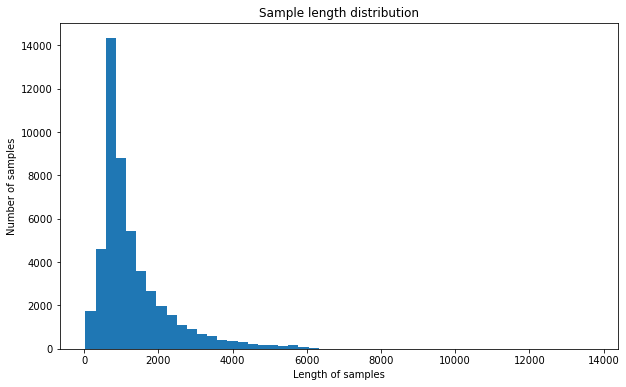

In [11]:
# Now, let's see the average number of words per sample
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['review'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

# Séparation

In [13]:
???séparer le jeu de données 80% train, 20%val ???

# Nettoyage 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

def vectorize_data(max_features=1000):    
    vectorizer = CountVectorizer(max_features=max_features)
    X_train_vect_texts = ???
    X_val_vect_texts = ???
    return X_train_vect_texts, X_val_vect_texts

In [27]:
X_train_vect_texts, X_val_vect_texts = vectorize_data(max_features=1000)

<40000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3591802 stored elements in Compressed Sparse Row format>

# Création du model avec Keras

In [20]:
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow import keras

In [25]:
X_train.shape[0]

40000

In [41]:
def build_model(input_shape, DROPOUT_RATE = 0.2, UNITS = 64, NUM_CLASSES = 2):

    model = keras.Sequential()
    # Applies Dropout to the input
    model.add(Dropout(rate=DROPOUT_RATE, input_shape=??))
    model.add(Dense(units=UNITS, activation=??))
    model.add(Dropout(rate=DROPOUT_RATE))
    #Last layer
    model.add(Dense(units=1, activation=??))
    model.summary()
    return model

In [42]:
model = build_model(???)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                64064     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 64,129
Trainable params: 64,129
Non-trainable params: 0
_________________________________________________________________


## Compilation

In [30]:
LEARNING_RATE = 1e-3
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='???', metrics=['???'])

# Entrainement

In [38]:
def train_model(EPOCHS = 100, BATCH_SIZE = 128, patience=5):
    
    # Create callback for early stopping on validation loss. If the loss does
    # not decrease on two consecutive tries, stop training
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=patience)]


    history = model.fit(???, callbacks=callbacks)
    return history 

In [39]:
history = train_model(EPOCHS = 100, BATCH_SIZE = 128, patience=5)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 63us/sample - loss: 0.2224 - acc: 0.9082 - val_loss: 0.3141 - val_acc: 0.8663
Epoch 2/100
40000/40000 [==============================] - 3s 65us/sample - loss: 0.2187 - acc: 0.9094 - val_loss: 0.3202 - val_acc: 0.8624
Epoch 3/100
40000/40000 [==============================] - 3s 65us/sample - loss: 0.2130 - acc: 0.9139 - val_loss: 0.3183 - val_acc: 0.8626
Epoch 4/100
40000/40000 [==============================] - 3s 64us/sample - loss: 0.2094 - acc: 0.9144 - val_loss: 0.3259 - val_acc: 0.8601
Epoch 5/100
40000/40000 [==============================] - 3s 66us/sample - loss: 0.2059 - acc: 0.9165 - val_loss: 0.3258 - val_acc: 0.8631
Epoch 6/100
40000/40000 [==============================] - 3s 64us/sample - loss: 0.1992 - acc: 0.9170 - val_loss: 0.3320 - val_acc: 0.8574


On constate que notre modèle stagne assez vite, probablement lié au fait du faible volume de données, peut-être que l'on peut augmenter le nombre de feautres ?

In [43]:
X_train_vect_texts, X_val_vect_texts = vectorize_data(max_features=10000)
model = build_model(X_train_vect_texts.shape[1:])

#compile
LEARNING_RATE = 1e-3
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

history = train_model(EPOCHS = 100, BATCH_SIZE = 128, patience=5)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 19s 487us/sample - loss: 0.3713 - acc: 0.8445 - val_loss: 0.2640 - val_acc: 0.8965
Epoch 2/100
40000/40000 [=============================

On peut observer que les résultats semblent plus intéressants > + 0.04 en val_acc
Essayons d'analyser nos résultats

# Analyse des résultats

In [49]:
y_val_pred = ???

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(???)
print(cf_matrix)

[[4481  480]
 [ 602 4437]]


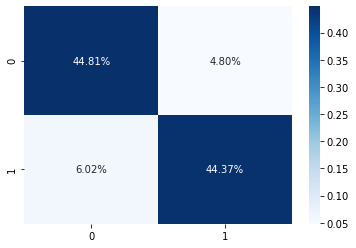

In [54]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

0 negatif
1 positif


Visiblement  on a tendance a dire un peu trop souvent qu'une donnée positive est négative

Y a t'il une longuer de review que l'on prédit moins bien ?

In [74]:
val_is_good_pred = y_val.values == y_val_pred.flatten()

In [119]:
reviews_val_len = X_val.apply(lambda x : len(x)  //500 * 500).values 

In [120]:
df = pd.DataFrame({"len" :reviews_val_len, "pred": val_is_good_pred})

In [143]:
df = df[df["pred"] == False]

In [144]:
df.groupby(???)

pred
           count
len  pred       
0    False    97
500  False   450
1000 False   237
1500 False   123
2000 False    78
2500 False    41
3000 False    25
3500 False     9
4000 False     9
4500 False     3
5000 False     5
5500 False     5